# Integrated Project

## Introduction

This project was made as part of the Practicum by Yandex course, to analyze video-games sales and determine what games succeed. The results will allow us to spot potential good games and plan advertising campaigns.

#### Importing libraries

In [20]:
import pandas as pd        
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from scipy import stats as st

In [34]:
#Exploring the data file and general information.

try:
    data = pd.read_csv("C:\\Users\\Shir\\Downloads\\Practicum\\Library\\games.csv")
except:
     print("An error occurred")
        
print('\033[1m', 'Data', '\033[0m')
print('--------------------------------------')        
display(data.info())
display(data.describe())
display(data.head(5))

 Data 
--------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Conclusion: 

11 columns,16715 rows

#Columns needs to be renamed to lowercases.
1. Name - string, contains data on 11559 unique names, 2 missing values.
2. Platform - string, 31 uniqe platforms, where PS2 and DS are the most popular.
3. Year_of_Release - between 1980 and 2006, 269 missing values, type needs to be converted to a numeric scale.
4. Genre - string, 12 unique genres, Action is the most common Genre, 2 missing values.
5. NA_sales - sales in North America in millions(USD), no missing values, but many games has 0 sales.
6. EU_sales - sales in Europe in millions(USD), no missing values, but many games has 0 sales.
7. JP_sales - sales in Japan in millions(USD), no missing values, but many games has 0 sales.
8. Other_sales - sales in other countries in millions(USD), no missing values, but many games has 0 sales.
9. Critic_Score - 8578 missing values, needs to be converted to a numeric scale.
10. User_Score - 6701 missing values, most common value is tbd, which isn't a score. needs to be converted to numerical sacle.
11. Rating - string, 8 unique ratings, 4 main ratings, 6766 missing values.

# Data preprocessing

In [35]:
#converting column headers to lower cases:
data = data.rename(columns=str.lower)
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

#### dealing with missing values and errors:

In [36]:
data = data.dropna(subset=['name'])
display(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


None

Missing values in the name column will be dropped, as we can't guess the name of the game, and it's only 2 values out of 16715, so it's insignifcant.

In [37]:
#Filling missing values in the year_of_release column and changing the type:
data['year_of_release'] = data['year_of_release'].fillna(round(data.groupby(['name'])['year_of_release'].transform('median'),0))
data = data.dropna(subset=['year_of_release'])

There are only 269 missing values in the year_of_release column, but as the important information is the sales amount, we want to keep as many games, so they will be filled by the year of release of other games with the same name. After replacing the missing values, we are left with only 146 values, and they will be dropped.

In [38]:
#Filling missing values in the critic_score column by it's games mean:
data['critic_score'] = data['critic_score'].fillna(round(data.groupby(['name'])['critic_score'].transform('median'),0))
#Missing values left will be filled with the median, and changing the type:
data['critic_score'] = data['critic_score'].fillna(value= data['critic_score'].median()).astype(int)
display(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  float64
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     16567 non-null  int32  
 9   user_score       9934 non-null   object 
 10  rating           9868 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.5+ MB


None

Missing values in the critic_score column can't be dropped as they are more than 50% of our data, instead they are replaced with the median value.

In [39]:
#Filling missing values with 0 for now:
data['user_score'] = data['user_score'].fillna('0')

#Converting the user score 'tbd' to 0:
data["user_score"].replace({"tbd": '0'}, inplace=True)

#Converting the user score to float:
data['user_score'] = data.user_score.astype(float)

#Converting the user score to the same scale of the critics score(maximun of 100), by multiplaing it by 10:
data['user_score'] = data['user_score']*10

#Converting the user score to int:
data['user_score'] = data.user_score.astype(int)

data[data['user_score'] != 0].median()


#0 values will be filled with the median:
data["user_score"] = data["user_score"].mask(data["user_score"] == 0).fillna(data['user_score'][data['user_score'] != 0].median())

display(data.head(5))


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76,80.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,71,75.0,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82,83.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80,80.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,71,75.0,NaN


user_score was converted to the same scale as the critic_score, for a more convenient analysis. Missing values were also replaced with the median values.

In [40]:
data['rating'] = data['rating'].fillna(value= 'Unkown')

Missing values in the rating column can't be dropped as they are a big percent of our data, they will be replaced by the string 'Unkown'.

In [41]:
#adding a new column to represent the total sales:
data['total_sales'] = data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']

#adding a new column to represent the average score of both users and critics sales:
data['avg_score'] = (data['critic_score']+data['user_score'])/2
data['avg_score'] = data['avg_score'].astype(int)


#### Conclusion:

In [42]:
display(data.info())
display(data.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  float64
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     16567 non-null  int32  
 9   user_score       16567 non-null  float64
 10  rating           16567 non-null  object 
 11  total_sales      16567 non-null  float64
 12  avg_score        16567 non-null  int32  
dtypes: float64(7), int32(2), object(4)
memory usage: 1.6+ MB


None

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales,avg_score
count,16567.000000,16567.000000,16567.000000,16567.000000,16567.000000,16567.000000,16567.000000,16567.000000,16567.000000
mean,2006.490433,0.263975,0.145814,0.078020,0.047567,69.803706,73.297942,0.535376,71.405867
std,5.862690,0.816474,0.505364,0.310068,0.187476,10.478771,10.262536,1.554281,8.859021
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,2.000000,0.000000,11.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,69.000000,75.000000,0.060000,70.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,75.000000,0.170000,73.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,72.000000,75.000000,0.470000,73.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,97.000000,82.540000,95.000000


We are left with 16567 rows, no missing values.

Main actions that were made: 

1. Columns names were converted to lowercase.
2. Missing values(2) in the name column were dropped.
3. Missing values(146) in the year_of_release column were dropped.
4. Missing values in the critic_score column were replaced by the median.
5. user_score column was converted to the same scale as the critic_score, missing values were replaced by the median.
6. Missing values in the rating column were replaced by the string 'Unkown'.
7. A new column was added, representing the total sales.

# Analyzing the data

Text(0, 0.5, 'Number of Games')

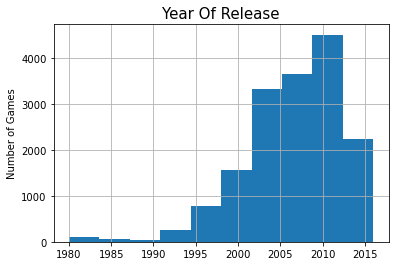

In [43]:
#Look at how many games were released in different years
data['year_of_release'].hist()
plt.title('Year Of Release',fontsize=15)
plt.ylabel("Number of Games")

In [44]:
#Check mean, std
display(data['year_of_release'].describe())

count    16567.000000
mean      2006.490433
std          5.862690
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

Wee see that most of the games in our data are pretty much new, and were released in the last 10 years, this is a left-skewed distribution. The mean is 2006 and the median is 2007, 75% of the games were released after 2010.
We can focus in our analysis on the majority of the games.

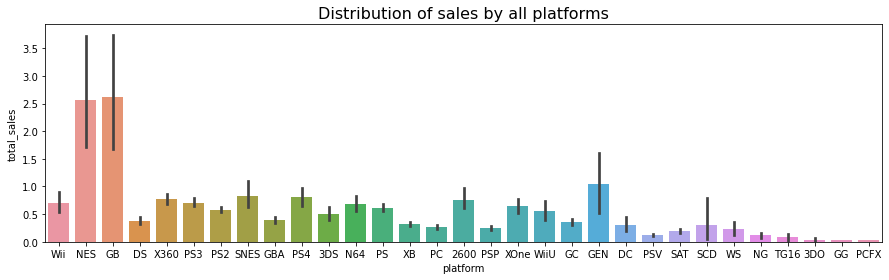

In [45]:
#Look at how sales varied from platform to platform
import seaborn as sns
plt.figure(figsize=(15, 4))
plt.title('Distribution of sales by all platforms', fontsize=16)
sns.barplot(x='platform', y='total_sales', data = data)
plt.show()

When we look at the total data from all years, NES and GB are the platforms with the greatest total sales.

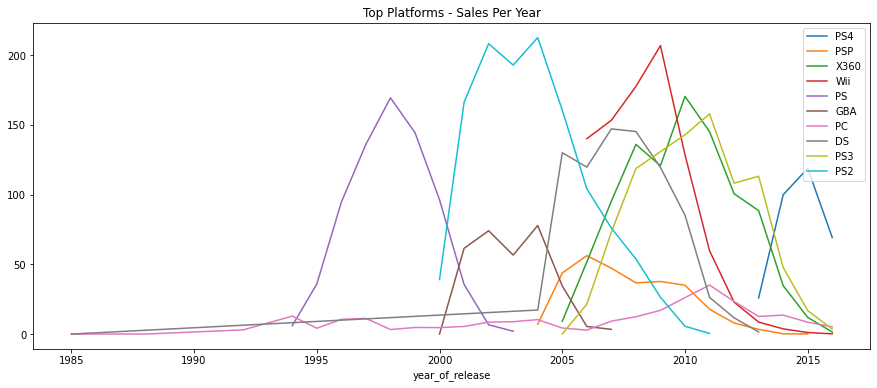

In [46]:
#Top platforms only:
top_platforms = data.groupby('platform').total_sales.sum().sort_values().index[-10:]
top_platforms = set(top_platforms.to_list())

#See how long does it generally take for new platforms to appear and old ones to fade:
plt.figure(figsize=(15, 6))

for i, platform in enumerate(top_platforms):
    # Subset to the platform
    subset = data[data['platform'] == platform]
    # Drow the plot
    subset.groupby('year_of_release').total_sales.sum().plot(
        label=platform, title='Top Platforms - Sales Per Year')
plt.legend(loc="upper right")
plt.show()

We see that platforms don't stay at the top for too long, for most of the platforms it takes between 5-10 years to appear and fade.

In [47]:
#The focus will be on the years 2013-2016:
data_new = data[data['year_of_release'] >= 2013]

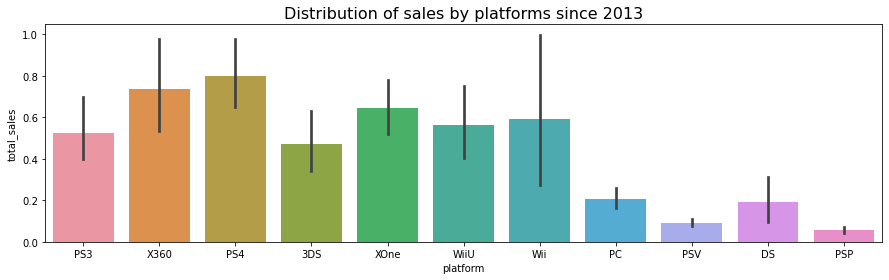

In [49]:
#Check which platforms are leading in sales in the time frame chosen:

plt.figure(figsize=(15, 4))
plt.title('Distribution of sales by platforms since 2013', fontsize=16)
sns.barplot(x='platform', y='total_sales', data = data_new)
plt.show()

The potentially profitable platforms are PS4, X360 XOne, and Wii

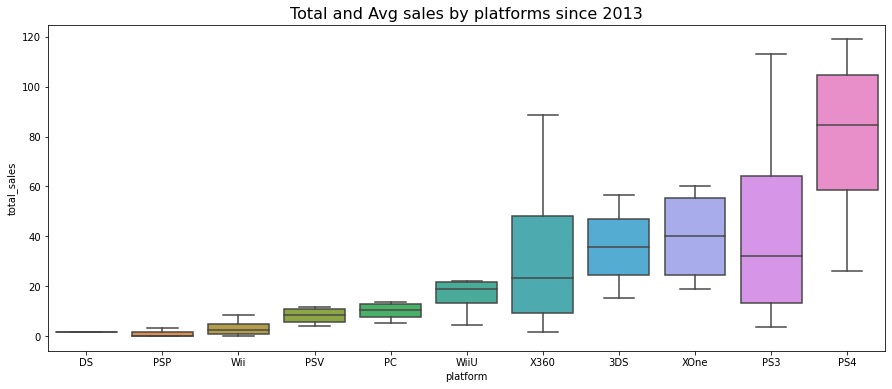

In [50]:
#Box plots for the global sales of all games, broken down by platform:

sales_data = data_new.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()
order = sales_data.groupby(['platform'])['total_sales'].sum().sort_values().reset_index()['platform']
plt.figure(figsize=(15,6))
plt.title('Total and Avg sales by platforms since 2013', fontsize=16)
sns.boxplot(x='platform',y='total_sales',data=sales_data,order=order)
plt.show()

There are differences in sales, PS4 had significantly more sales then other platforms.
If we look at the average sales, we also see a difference as PS4 had the highest average. PS3, XOne, 3DS and X360 had also high sales on average.

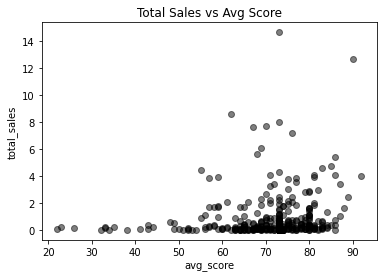

In [51]:
#Scatter plot for PS4 and calculating the correlation between reviews and sales:

plt.scatter(data_new[data_new.platform == 'PS4']['avg_score'],
            data_new[data_new.platform == 'PS4']['total_sales'], color='black', alpha=.5)
plt.xlabel('avg_score')
plt.ylabel('total_sales')
plt.title('Total Sales vs Avg Score')
plt.show()

PS4 was chosen as it is one of the most popular platforms in the date frame chosen, there is a weak positive correlation.

In [52]:
#Look at the correlation of the user, critics and combined scores:
data_new[['user_score', 'critic_score', 'avg_score', 'total_sales']].corr()

,user_score,critic_score,avg_score,total_sales
user_score,1.000000,0.320728,0.853917,-0.060884
critic_score,0.320728,1.000000,0.766264,0.249801
avg_score,0.853917,0.766264,1.000000,0.094311
total_sales,-0.060884,0.249801,0.094311,1.000000


The conclusion is that critics score affect total sales more then users score, as wee see a stronger correlation(positive) between sales and critics score.
We can learn from this information that players will trust critics score more then users score when spending money on games.

In [53]:
#Check which games has more then 4 platforms info:

name_platform = data_new.groupby(['name']).filter(lambda x: x['platform'].count() >= 4)
name_platform.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,avg_score
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97,82.0,M,21.05,89
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97,81.0,M,16.27,89
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,71,75.0,Unkown,14.63,73
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97,83.0,M,12.62,90
60,Call of Duty: Ghosts,X360,2013.0,Shooter,6.73,2.56,0.04,0.91,73,26.0,M,10.24,49
69,Call of Duty: Ghosts,PS3,2013.0,Shooter,4.10,3.63,0.38,1.25,71,26.0,M,9.36,48
72,Minecraft,X360,2013.0,Misc,5.70,2.65,0.02,0.81,71,75.0,Unkown,9.18,73
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82,43.0,E,8.58,62
92,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,2.81,3.48,0.14,1.23,83,57.0,M,7.66,70
94,FIFA 17,PS4,2016.0,Sports,0.66,5.75,0.08,1.11,85,50.0,E,7.60,67


Game chosen is "Call of Duty: Advanced Warfare", which has a high score and sales on 5 different platforms, in 2014.

In [54]:
#comparing the sales of the "Call of Duty: Advanced Warfare" on different platforms:

col_war = name_platform.query('name == "Call of Duty: Advanced Warfare"')
col_war

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,avg_score
92,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,2.81,3.48,0.14,1.23,83,57.0,M,7.66,70
179,Call of Duty: Advanced Warfare,XOne,2014.0,Shooter,3.22,1.55,0.01,0.48,81,54.0,M,5.26,67
255,Call of Duty: Advanced Warfare,PS3,2014.0,Shooter,1.56,1.93,0.19,0.68,81,48.0,M,4.36,64
263,Call of Duty: Advanced Warfare,X360,2014.0,Shooter,2.77,1.11,0.00,0.40,81,49.0,M,4.28,65
4736,Call of Duty: Advanced Warfare,PC,2014.0,Shooter,0.15,0.23,0.00,0.03,78,45.0,M,0.41,61


In [55]:
col_war[['user_score', 'critic_score','avg_score', 'total_sales']].corr()

,user_score,critic_score,avg_score,total_sales
user_score,1.000000,0.856996,0.982977,0.920377
critic_score,0.856996,1.000000,0.931266,0.988746
avg_score,0.982977,0.931266,1.000000,0.968751
total_sales,0.920377,0.988746,0.968751,1.000000


Same as in the last analysis, we see that users score does not affect sales, and critics score, has a much stronger affect.

In [56]:
#Review the general distribution of games by genre
data_new.groupby('genre')[['total_sales']].sum().sort_values('total_sales', ascending=False).style.bar()

,total_sales
genre,
Action,322.500000
Shooter,232.980000
Sports,150.650000
Role-Playing,145.890000
Misc,63.060000
Platform,42.630000
Racing,39.890000
Fighting,35.310000
Adventure,23.640000


The most profitable genres are Action, Shooters, Sports and Role-playing. Possible explantion is that these genres are more competitive, requires more energy and are more complex(play and development), and that's what makes them more popular.

# Create a user profile for each region

### The top five platforms by region

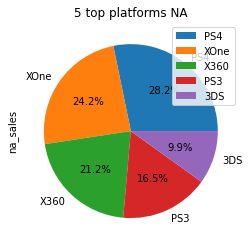

In [57]:
# plot for North America region
data_new_region = data_new.groupby(['platform'])['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending = False)
top_platforms = data_new_region.head()
(top_platforms.set_index('platform').plot(y='na_sales', kind='pie', title = '5 top platforms NA', figsize=(4, 4), autopct='%1.1f%%')
);


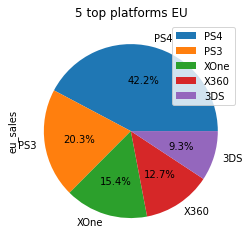

In [58]:
# plot for Europe region
data_new_region = data_new.groupby(['platform'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending = False)
top_platforms = data_new_region.head()
(top_platforms.set_index('platform').plot(y='eu_sales', kind='pie', title = '5 top platforms EU', figsize=(4, 4), autopct='%1.1f%%')
);

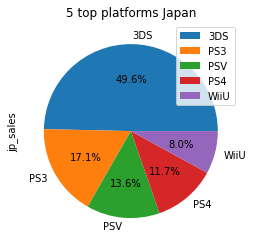

In [59]:
# plot for Europe region
data_new_region = data_new.groupby(['platform'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending = False)
top_platforms = data_new_region.head()
(top_platforms.set_index('platform').plot(y='jp_sales', kind='pie', title = '5 top platforms Japan', figsize=(4, 4), autopct='%1.1f%%')
);

We see variations in the market shares from region to region, while 3DS is the most popular platform in Japan, it's the least popular platform in NA and EU. 
PS4 is the most popular platform in NA and EU but it's not that popular in Japan(5th place with 11.7% only).
If we would like to release a game to ensure it will be excepted in all regions, it will probably have to be in PS3/PS4 platforms, as they are at the top of all regions.

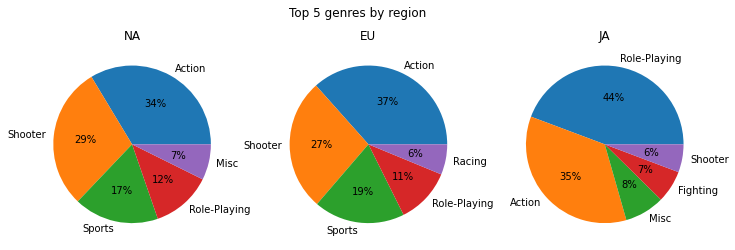

In [60]:
#The top five genres by region:
na_genres = data_new.groupby('genre').na_sales.sum().nlargest(5)
eu_genres = data_new.groupby('genre').eu_sales.sum().nlargest(5)
jp_genres = data_new.groupby('genre').jp_sales.sum().nlargest(5)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

fig.suptitle('Top 5 genres by region')

ax1.pie(na_genres, labels=na_genres.index, autopct='%1.f%%')
ax2.pie(eu_genres, labels=eu_genres.index, autopct='%1.f%%')
ax3.pie(jp_genres, labels=jp_genres.index, autopct='%1.f%%')


ax1.title.set_text('NA')
ax2.title.set_text('EU')
ax3.title.set_text('JA')

plt.show()

We again see a difference between Japan and NA/EU, while Role-playing is the most popular genre in Japan, it's not that popular in NA/EU. 
Action, Shooters and sports are the most popular genres in NA and EU(80%+ combined), and they are not very popular genres in Japan(41% combined, which is half!)
The differences could be explained by the different platforms, DS platform which is the most popular in Japan is better suited to play role playing games, while platforms like PS4, X360 and XOne are more for actions and sports games.

### Do ESRB ratings affect sales in individual regions?

In [61]:
#Check ESRB ratings in North America:
data_new_ratings_na= data_new.groupby(['rating'])['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending = False)
data_new_ratings_na = data_new_ratings_na.reset_index(drop=True)
data_new_ratings_na

,rating,na_sales
0,M,165.29
1,Unkown,89.42
2,E,79.05
3,E10+,54.24
4,T,49.79


In [62]:
#Check ESRB ratings in Europe:
data_new_ratings_eu= data_new.groupby(['rating'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending = False)
data_new_ratings_eu = data_new_ratings_eu.reset_index(drop=True)
data_new_ratings_eu

,rating,eu_sales
0,M,145.80
1,E,83.36
2,Unkown,78.91
3,E10+,42.69
4,T,41.95


In [63]:
#Check ESRB ratings in Japan:
data_new_ratings_jp= data_new.groupby(['rating'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending = False)
data_new_ratings_jp = data_new_ratings_jp.reset_index(drop=True)
data_new_ratings_jp

,rating,jp_sales
0,Unkown,85.29
1,T,20.59
2,E,15.14
3,M,14.11
4,E10+,5.89


It seems that there is an effect, as the most popular ratings in NA and EU are M and E. In Japan we don't have a lot of information, as "Unkown" is the most common rating. As "E" is the general rating for all populations, it does not give us a lot of information, "M" is for a mature audience, meaning the top consumers of games are mature and general(which is also mature in majority). It's important for future campaigns, as we now know what is the main group of audience. 

# Testing the hypotheses

## XBox One Vs. PC

Formulating the H0 and H1 hypotheses.

H0 = the mean user score of XBox One platform is equal to the mean user score of PC platform

H1 = the mean user score of XBox One platform is NOT equal to the mean user score of PC platform

critical statistical significance level(alpha) = 0.05

In [64]:
#check the mean of both populations:
data_new.groupby('platform').user_score.describe().loc[['XOne', 'PC']]

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
XOne,247.0,67.789474,12.607755,16.0,61.0,72.0,75.0,92.0
PC,192.0,64.963542,16.408519,14.0,57.0,71.0,75.0,93.0


In [65]:
#Check the variance:
display(data_new.query('platform == "XOne"').user_score.var())
display(data_new.query('platform == "PC"').user_score.var())


158.95549850235324

269.2395015270506

We see that the variance is slightly different, but the varince is much different, so we can't assume equal means in this case, so equal_var will be set to False.

In [66]:
results = st.ttest_ind(data_new.query('platform == "XOne"').user_score.dropna(), 
                      data_new.query('platform == "PC"').user_score.dropna(), 
                      equal_var=False)
alpha = 0.05
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypohesis')
else:
    print('We fail to reject the null hypothesis')

p-value: 0.048972348940764486
We reject the null hypohesis


We used t test assuming that the variances of the populations from which different samples were drawn(XBox One and PC) are not equal.
The p-value is smaller than the alpha, and we reject the null hypothesis, meaning that the average user score in XBox One platform is signifintluy differnt than the user score in PC platform.

## Action Vs. Sports

Formulating the H0 and H1 hypotheses.

H0 = the mean user score of Action genre is equal to the mean user score of Sports genre

H1 = the mean user score of Action genre is NOT equal to the mean user score of Sports genre

critical statistical significance level(alpha) = 0.05

In [67]:
#check the mean of both populations:
data_new.groupby('genre').user_score.describe().loc[['Action', 'Sports']]

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,769.0,71.622887,10.045640,20.0,71.0,75.0,75.0,91.0
Sports,214.0,58.088785,18.286622,2.0,44.0,61.5,75.0,88.0


In [68]:
display(data_new.query('genre == "Action"').user_score.var())
display(data_new.query('genre == "Sports"').user_score.var())

100.91489217598654

334.4005309113248

We see that the mean and the variance is different, so we can't assume equal means in this case as well, so equal_var will be set to False.

In [69]:
results_2 = st.ttest_ind(data_new.query('genre == "Action"').user_score.dropna(), 
                      data_new.query('genre == "Sports"').user_score.dropna(), 
                      equal_var=False)
alpha = 0.05
print('p-value:', results_2.pvalue)

if results_2.pvalue < alpha:
    print('We reject the null hypohesis')
else:
    print('We fail to reject the null hypothesis')

p-value: 2.801130120250549e-21
We reject the null hypohesis


The p-value is not higher than the alpha, and we reject the null hypothesis, meaning that the average user score in action games  is signifintluy differnt than the user score in sports games.

# Conclusion

The Project's goal was to examine yearly video games sales and determine if the game succeeds or not. The results of the analysis should help plan future advertising campaigns, and increase the revenue from video games sales.

The data contains information on 11426 games, from 1980 to 2016, and their sales and rating info from 4 different regions(North America, Europe, Japan, and other countries). Data preprocessing was made by replacing or removing missing values and errors according to the best possible method.

Data were categorized, as most of the games in our data were released in the last 10 years, we decided to focus our analysis on games released between 2013-2016. We focused on the potentially profitable platforms which are PS4, PS3, DS, X360 and Wii.

After analyzing the data we found some insights about the given information:
1. Platforms don't stay at the top for too long, for most of the platforms, it takes between 5-10 years to appear and fade.
2. We examined the effect of users and critics score on sales, and found that critics score affect total sales more than users score. 
3. After comparing the sales of games on different platforms, we see that sales vary a lot between platforms.
4. The most profitable genres are Action, Sports, and shooters.

For further analysis, we created a user profile for each region and discovered big differences between the regions, While in NA and EU the most popular genres are Action, Shooters, and sports, in Japan the most popular genre is Role-playing. 
We also examined ESRB ratings and how they affect sales in individual regions and found that the main group of audience is mature.

Statistical data analysis was formulated by checking the hypothesis on the equality of two population means, 0.05 used as the critical statistical significance level.
The hypothesis was tested and we couldn't confirm that the average user scores of the Xbox One platform and the PC platforms are the same.
We also tested another hypothesis and checked if the average user score of Action genre is equal to the average user score of Sports genre, we could not confirm it as well.


Main findings:

1. As players will trust critics score more than users score when deciding if to buy a game or not, it's better to invest in promoting critics score rather than user score.
2. There is a great difference between NA and EU to Japan, as it seems like a very different market with different culture of gaming. We would recommend designing unique campaigns for platforms popular in Japan like the 3DS, and for games in specific genres popular in Japan like Role-playing.
3. Hypothesis tested and we couldn't confirm that the average user scores of the Xbox One platform and the PC platforms are the same, we also couldn't confirm that the average user scores in the Action genre and Sports genre are the same.